## **ACCY 593 - Yellow Cab Case** 
### Group 1 - Nan Zhang; Marc Malmquist; Yemisi Aremu; Elaine Du; Thomas Coats

#### Load Relevant Packages and Dependencies

In [1]:
# database, time, and visualization tools
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodels formula
import statsmodels.formula.api as smf

# to show graphs inline
%matplotlib inline

# disable an unneeded warning
pd.options.mode.chained_assignment = None
# default = 'warn'

#### 3 - Load and look at the Data

In [2]:
yellow_cab = pd.read_csv('Yellow Cab_Data.csv', delimiter=',')

In [3]:
yellow_cab.shape

(2000000, 23)

In [4]:
yellow_cab.columns

Index(['company', 'dropoff_census_tract', 'dropoff_centroid_latitude',
       'dropoff_centroid_location', 'dropoff_centroid_longitude',
       'dropoff_community_area', 'extras', 'fare', 'payment_type',
       'pickup_census_tract', 'pickup_centroid_latitude',
       'pickup_centroid_location', 'pickup_centroid_longitude',
       'pickup_community_area', 'taxi_id', 'tips', 'tolls',
       'trip_end_timestamp', 'trip_id', 'trip_miles', 'trip_seconds',
       'trip_start_timestamp', 'trip_total'],
      dtype='object')

In [5]:
yellow_cab.sample(10)

,company,dropoff_census_tract,dropoff_centroid_latitude,dropoff_centroid_location,dropoff_centroid_longitude,dropoff_community_area,extras,fare,payment_type,pickup_census_tract,...,pickup_community_area,taxi_id,tips,tolls,trip_end_timestamp,trip_id,trip_miles,trip_seconds,trip_start_timestamp,trip_total
843996,Taxi Affiliation Services,1.703108e+10,41.905858,"{'type': 'Point', 'coordinates': [-87.63086502...",-87.630865,8.0,0.0,4.65,Cash,1.703108e+10,...,8.0,51e37146cd6467734e50a00ffe2ebbb77ee35e5f207817...,0.0,0.0,2015-01-01T03:15:00.000,11b6406723011c97a123ebf415a5ee5b5ae37d17,0.6,240.0,2015-01-01T03:15:00.000,4.65
879155,Dispatch Taxi Affiliation,1.703184e+10,41.898306,"{'type': 'Point', 'coordinates': [-87.65361398...",-87.653614,24.0,1.0,5.25,Cash,1.703183e+10,...,28.0,3e0132f8a22b4e9edd4b62bf9708cf185572d2ad6c6266...,0.0,0.0,2015-09-09T23:15:00.000,11cea34462f604cd0c5db1885d5992622263fcd4,0.0,300.0,2015-09-09T23:15:00.000,6.25
1239510,NaN,1.703108e+10,41.905858,"{'type': 'Point', 'coordinates': [-87.63086502...",-87.630865,8.0,2.0,5.65,Cash,1.703108e+10,...,8.0,9b48ad5744e86450fb4db78e7095a6827bafc43a6a9d9a...,0.0,0.0,2015-08-20T00:00:00.000,12c892b8a8d35ff50fab54b49a650e5e255f0210,0.6,360.0,2015-08-20T00:00:00.000,7.65
445665,NaN,NaN,41.944227,"{'type': 'Point', 'coordinates': [-87.65599818...",-87.655998,6.0,0.0,4.00,Cash,NaN,...,6.0,78d1ae230754ef2eca7aa3e828789bc4714b8a261a35d5...,0.0,0.0,2016-07-30T00:00:00.000,10a1dc56c084992fdf0b4e268461c40f3f98de57,0.2,120.0,2016-07-30T00:00:00.000,4.00
860605,Taxi Affiliation Services,1.703124e+10,41.906026,"{'type': 'Point', 'coordinates': [-87.67531162...",-87.675312,24.0,0.0,9.65,Cash,1.703184e+10,...,32.0,4c44c95be8b37539aff5ca9e7840cd7951ebf1fa73d62e...,0.0,0.0,2014-04-22T01:00:00.000,11c1b9dc80de9379f55fc37d3aa6300cdd714dcd,3.3,480.0,2014-04-22T00:45:00.000,9.65
82565,Taxi Affiliation Services,1.703108e+10,41.902788,"{'type': 'Point', 'coordinates': [-87.62614558...",-87.626146,8.0,2.0,37.65,Credit Card,1.703198e+10,...,76.0,2e82e26afb77e809fe4a44b02a152bdc079623600ae1b7...,7.9,0.0,2013-08-22T22:45:00.000,0fa660508ba7c5dfbcffacf5e2000588f9e6b02e,0.0,1920.0,2013-08-22T22:15:00.000,47.55
1517729,NaN,NaN,41.922686,"{'type': 'Point', 'coordinates': [-87.64948872...",-87.649489,7.0,1.0,5.25,Cash,NaN,...,7.0,468715c4e6b0967d57ec45e4ee960045525de2b01a3229...,0.0,0.0,2016-10-23T01:45:00.000,138886b5e124bf5517c9011f4505899ef3d692cd,0.8,240.0,2016-10-23T01:30:00.000,6.25
1958772,Taxi Affiliation Services,NaN,41.899602,"{'type': 'Point', 'coordinates': [-87.63330803...",-87.633308,8.0,1.0,6.75,Cash,NaN,...,8.0,fe3f654450472e6aa241347b9ebb7f78ce4628a0069cfc...,0.0,0.0,2017-04-06T17:45:00.000,14ba302d6ec15f0426b5fc3088251f4647d5fd6f,0.0,480.0,2017-04-06T17:30:00.000,7.75
1908942,NaN,1.703122e+10,41.921020,"{'type': 'Point', 'coordinates': [-87.71035914...",-87.710359,22.0,1.0,13.25,Cash,1.703124e+10,...,24.0,c277cbe417b22e049274ecb4d91bb6612bdb6932c6bcbe...,0.0,0.0,2014-01-25T20:45:00.000,1497a13010bebdb530a03ee82484318ac1b84bb4,5.1,900.0,2014-01-25T20:30:00.000,14.25
1761408,Choice Taxi Association,1.703132e+10,41.877406,"{'type': 'Point', 'coordinates': [-87.62197165...",-87.621972,32.0,0.0,4.85,Credit Card,1.703132e+10,...,32.0,29b6866f97b4ee801bebc5fc21758f7092c13f43884c58...,2.0,0.0,2015-03-05T18:30:00.000,1431a32f22b724f3b4369f0a151970a5f0cf03ab,0.1,240.0,2015-03-05T18:30:00.000,6.85


##### 3b -  Columns with NaN values

Based on several samplings of the data above, the following columns with the True condition have NaN values needing further analysis and possible removal or replacement of these NaN values.

In [6]:
Nan = yellow_cab.isnull().any() 
print(Nan)

company                        True
dropoff_census_tract           True
dropoff_centroid_latitude      True
dropoff_centroid_location      True
dropoff_centroid_longitude     True
dropoff_community_area         True
extras                         True
fare                           True
payment_type                  False
pickup_census_tract            True
pickup_centroid_latitude       True
pickup_centroid_location       True
pickup_centroid_longitude      True
pickup_community_area          True
taxi_id                        True
tips                           True
tolls                          True
trip_end_timestamp             True
trip_id                       False
trip_miles                     True
trip_seconds                   True
trip_start_timestamp          False
trip_total                     True
dtype: bool


##### 3c - Columns for Analysis

There are several columns that could be used for analysis.  The most obvious columns would be the following:

- Company
- Extras
- Fare
- Payment Type
- Tips
- Tolls
- Any location or time based columns

It will be interesting to see if different payment types lead to higher revenue or tips.  It will also be helpful to trace the paths of cabs to help drivers understand where the best areas to make the most money are.


There appears to be some bad data that will need to be cleaned.  The first step will be to remove any null or NaN values to be sure we are working with rows that have complete data.  Where possible, we can replace these values with 0, but we need to explore the data further to determine if such changes will create problems for us later in our analysis.

#### 4.1 Eliminate Bad Data

##### 4.1a

We remove trips from the data that have an NaN value in the trip_miles or trip_seconds column as they represent bad data points rather than actual trips.  We do not want to remove trips with 0 seconds and 0 miles becuase they are likely to be actual trips that were either not long enough to register a distance in miles at the two decimal threshold or were trips that were begun but immediately canceled.  We do not want to elimintate these trips from our dataset.

In [7]:
yellow_cab = yellow_cab.dropna(subset = ['trip_miles', 'trip_seconds', 'trip_total'])

##### 4.1b 

We delete all entries that have no entry or $0 for cost because no money was made on any of those trips and retaining them will cloud our data and analysis by reducing our average values.  A reduction of the average values will cause us to not see the true average to aid in our recommendations, which could ultimately lead to bad or uninformed decisions.

In [8]:
yellow_cab = yellow_cab[yellow_cab.trip_total > 0]

#### 4.2 - Make Datetime Objects

In [9]:
# convert 'trip_start_timestamp' and 'trip_end_timestamp' to datetime object
yellow_cab['trip_start_timestamp'] = pd.to_datetime(yellow_cab['trip_start_timestamp'])
yellow_cab['trip_end_timestamp'] = pd.to_datetime(yellow_cab['trip_end_timestamp'])

In [10]:
# create new columns for year, month, day, hour and day of the week
yellow_cab['year'] = yellow_cab['trip_start_timestamp'].dt.year
yellow_cab['month'] = yellow_cab['trip_start_timestamp'].dt.month
yellow_cab['day'] = yellow_cab['trip_start_timestamp'].dt.day
yellow_cab['hour'] = yellow_cab['trip_start_timestamp'].dt.hour
yellow_cab['dayofweek'] = yellow_cab['trip_start_timestamp'].dt.dayofweek

In [11]:
# list the number of columns and rows
yellow_cab.shape

(1997211, 28)

#### 4.3 - Get Ride of Outliers

In [12]:
# eliminate outliers
yellow_cab['dollar_per_sec'] = np.where(yellow_cab.trip_seconds > 0, yellow_cab.trip_total / yellow_cab.trip_seconds, None)
yellow_cab = yellow_cab[yellow_cab['dollar_per_sec'] < 1.5]
yellow_cab.shape

(1937267, 29)

##### 4.3b

The above code removes all trips that cost more than $1.50 per second because it simply does not make sense that a cab ride would cost that much on a per second basis.  Eliminating those gives us more real world data.

In [13]:
yellow_cab.to_csv('Yellow Cab_clean.csv')

#### 5 - Descriptive Analytics - Explore the Data

In [14]:
yellow_cab_2015 = yellow_cab[yellow_cab['year'] == 2015]
yellow_cab_2015.shape

(477881, 29)

In [15]:
yellow_cab_2015.to_csv('Yellow Cab_2015.csv')

#### 6 - Predictive Analytics - Regression

In [16]:
yellow_cab['credit'] = np.where(yellow_cab.payment_type =="Credit Card", 1, 0)

##### 6.0a - Regression Test 1

The first regression analysis will use Trip Total as the dependent variable.

In [17]:
# Regression test 1
results1 = smf.ols('trip_total ~ trip_seconds + trip_miles + C(credit) + hour + month + dayofweek', data=yellow_cab).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             trip_total   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                 1.299e+05
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        13:41:08   Log-Likelihood:            -7.8955e+06
No. Observations:             1937267   AIC:                         1.579e+07
Df Residuals:                 1937260   BIC:                         1.579e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.2657      0.037    167.154      0.000       6.192       6.339
C(credit)[T.1]     6.0304      0.022    280.294      0.000       5.988       6.073
trip_seconds       0.0074   1.04e-05    715.129      0.000       0.007       0.007
trip_miles         0.1840      0.001    237.069      0.000       0.183       0.186
hour              -0.0322      0.002    -20.412      0.000      -0.035      -0.029
month             -0.0021      0.003     -0.692      0.489      -0.008       0.004
dayofweek         -0.0563      0.005    -10.544      0.000      -0.067      -0.046
================================================================================
Omnibus:                  9753801.534   Durbin-Watson:                     2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   1379414959545302.250
Skew:                         220.210   Prob(JB):                           0.00
Kurtosis:                  130727.167   Cond. No.                       4.78e+03
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Regression 1 Results

The payment type a rider uses seems to have a significant impact on the trip total.  Trip miles and seconds play a smaller role, but we expect the cab fare is charged by distance and time so this result also makes sense.  The hour, month, and day of the week do not have a positive correlation to trip total, which suggests that trip totals decrease later in the day, week, and year.  These changes are not large, but with the exception of Month, they are all statistically significant.

##### 6.0b - Regression Test 2

The second regression analysis will use Tips as the dependent variable.

In [18]:
# Regression test 2
results2 = smf.ols('tips ~ trip_seconds + trip_miles + C(credit) + hour + month + dayofweek', data=yellow_cab).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tips   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                 3.456e+05
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        13:41:16   Log-Likelihood:            -3.6975e+06
No. Observations:             1937267   AIC:                         7.395e+06
Df Residuals:                 1937260   BIC:                         7.395e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3250      0.004    -75.718      0.000      -0.333      -0.317
C(credit)[T.1]     3.1791      0.002   1290.249      0.000       3.174       3.184
trip_seconds       0.0005   1.19e-06    423.827      0.000       0.001       0.001
trip_miles         0.0148   8.89e-05    166.850      0.000       0.015       0.015
hour               0.0002      0.000      1.282      0.200      -0.000       0.001
month              0.0001      0.000      0.300      0.764      -0.001       0.001
dayofweek         -0.0239      0.001    -39.169      0.000      -0.025      -0.023
==============================================================================
Omnibus:                  3415401.988   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     122761066231.749
Skew:                          11.299   Prob(JB):                         0.00
Kurtosis:                    1236.015   Cond. No.                     4.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Regression 2 Results

These results show that the tip amount a rider leaves a cab driver is heavily dependent on the payment type.  Distance of a trip also appears to have an impact on tips, albeit still a small one when compared to payment type.

#### Additional Anaylsis

In [19]:
ycs = yellow_cab_2015.sample(2000)

yc15cash = ycs[ycs.payment_type == 'Cash']
yc15credit = ycs[ycs.payment_type == 'Credit Card']

C:\Users\thomas.coats\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


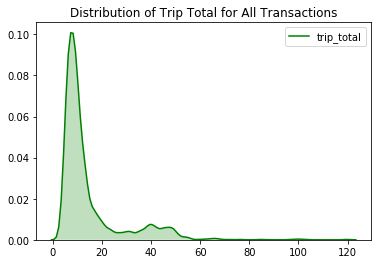

In [20]:
sns.kdeplot(ycs['trip_total'],shade=True, color='g')
plt.title('Distribution of Trip Total for All Transactions')
plt.show()

C:\Users\thomas.coats\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


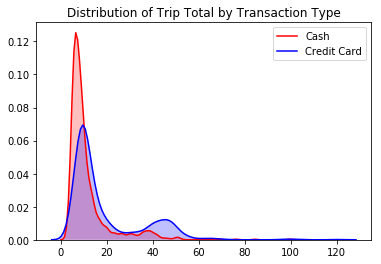

In [21]:
p1=sns.kdeplot(yc15cash['trip_total'], label = 'Cash', shade=True, color="r")
p1=sns.kdeplot(yc15credit['trip_total'], label = 'Credit Card', shade=True, color="b")
plt.title('Distribution of Trip Total by Transaction Type')
plt.show()

The distributions above show that trips paid with credit cards tend to have a higher trip total.  This result is also what we saw in our Regression analysis with Tips as the dependent variable.  We can conclude that customers will give larger tips to drivers when they pay with a credit card rather than with cash.